let's try to do this with `tf.data`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from tqdm import tqdm
from sklearn.preprocessing import normalize

%matplotlib inline
from IPython.core.pylabtools import figsize

In [2]:
from patchwork import PatchWork
from loader import load_ucmerced

In [3]:
figsize(9,9)

In [4]:
train_files, train_x, train_y, test_x, test_y = load_ucmerced()

In [5]:
test_y.mean()

0.14285714285714285

In [6]:
train_y.mean()

0.14285714285714285

In [7]:
np.random.seed(1)

In [8]:
eps_0 = PatchWork(train_x, train_files, epsilon=0, epochs=10)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
eps_0(num_calls=50, groundtruth=train_y, testx=test_x, testy=test_y)

  6%|▌         | 3/50 [00:01<00:53,  1.13s/it]

Instructions for updating:
Use tf.cast instead.


100%|██████████| 50/50 [02:31<00:00,  5.11s/it]


In [10]:
np.random.seed(1)

In [11]:
eps_1 = PatchWork(train_x, train_files, epsilon=1, epochs=10)

In [12]:
eps_1(num_calls=50, groundtruth=train_y, testx=test_x, testy=test_y)

100%|██████████| 50/50 [02:26<00:00,  4.97s/it]


In [13]:
np.random.seed(1)

In [14]:
eps_01 = PatchWork(train_x, train_files, epsilon=0.2, epochs=10)
eps_01(num_calls=50, groundtruth=train_y, testx=test_x, testy=test_y)

100%|██████████| 50/50 [02:17<00:00,  4.84s/it]


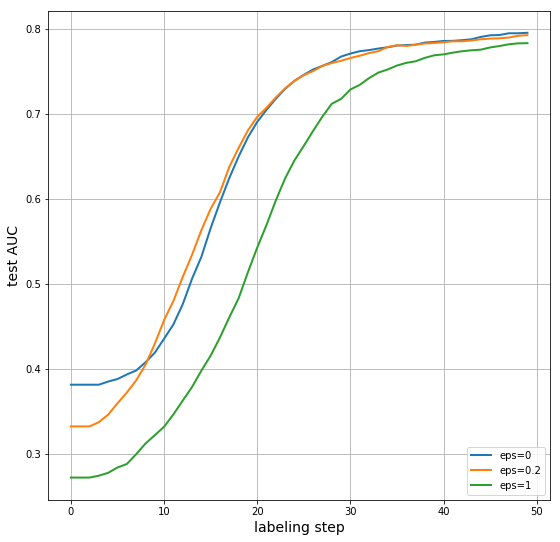

In [15]:
plt.plot(eps_0.test_auc, lw=2, label="eps=0")
plt.plot(eps_01.test_auc, lw=2, label="eps=0.2")
plt.plot(eps_1.test_auc, lw=2, label="eps=1")
plt.legend(loc="lower right")
plt.xlabel("labeling step", fontsize=14)
plt.ylabel("test AUC", fontsize=14)
plt.grid(True);